# Predicting Bike Rentals

In this project, I'll try to predict the total number of bikes people rented in a given hour. You'll predict the cnt column using all of the other columns, except for casual and registered. To accomplish this, you'll create a few different machine learning models and evaluate their performance.

Here are the descriptions for the relevant columns:

* instant - A unique sequential ID number for each row
* dteday - The date of the rentals
* season - The season in which the rentals occurred
* yr - The year the rentals occurred
* mnth - The month the rentals occurred
* hr - The hour the rentals occurred
* holiday - Whether or not the day was a holiday
* weekday - The day of the week (as a number, 0 to 7)
* workingday - Whether or not the day was a working day
* weathersit - The weather (as a categorical variable)
* temp - The temperature, on a 0-1 scale
* atemp - The adjusted temperature
* hum - The humidity, on a 0-1 scale
* windspeed - The wind speed, on a 0-1 scale
* *casual - The number of casual riders (people who hadn't previously signed up with the bike sharing program)*
* *registered - The number of registered riders (people who had already signed up)*
* **cnt - The total number of bike rentals (casual + registered)**


## Import Libraries and Read in Data

In [35]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [5]:
bike_rentals = pd.read_csv('bike_rental_hour.csv')
bike_rentals.head(29)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


(array([6972., 3705., 2659., 1660.,  987.,  663.,  369.,  188.,  139.,
          37.]),
 array([  1. ,  98.6, 196.2, 293.8, 391.4, 489. , 586.6, 684.2, 781.8,
        879.4, 977. ]),
 <a list of 10 Patch objects>)

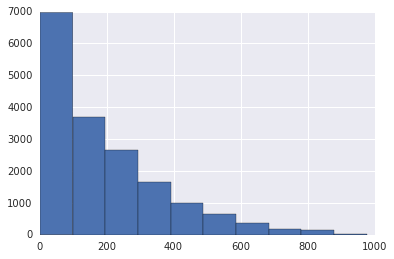

In [7]:
plt.hist(bike_rentals['cnt'])

In [9]:
corr_cnt = bike_rentals.corr()['cnt']
corr_cnt

instant       0.278379
season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

## Feature Engineering

* Bundle similar times together by creating a new column with labels for morning, afternoon, evening, night

In [10]:
def assign_label(hour):
    if hour >=0 and hour < 6:
        return 4
    elif hour >=6 and hour < 12:
        return 1
    elif hour >= 12 and hour < 18:
        return 2
    elif hour >= 18 and hour <=24:
        return 3
    
bike_rentals['time_label'] = bike_rentals['hr'].apply(assign_label)

In [12]:
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_label
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,4
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,4
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,4
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,4
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,4


## Train and Test Sets & Error Metric Evaluations

The mean squared error metric makes the most sense to evaluate our error. MSE works on continuous numeric data, which fits our data quite well.

In [13]:
train = bike_rentals.sample(frac=.8)

In [14]:
test = bike_rentals.loc[~bike_rentals.index.isin(train.index)]

In [19]:
features = list(train.columns)
features.remove('cnt')
features.remove('casual')
features.remove('dteday')
features.remove('registered')
features

['instant',
 'season',
 'yr',
 'mnth',
 'hr',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'time_label']

## Linear Regression

In [29]:
lr = LinearRegression()
lr.fit(train[features],train['cnt'])
test_predictions_lr = lr.predict(test[features])
error_lr = mean_squared_error(test['cnt'],test_predictions_lr)
error_lr

17612.55875619722

The error is very high, which may be due to the fact that the data has a few extremely high rental counts, but otherwise mostly low counts. Larger errors are penalized more with MSE, which leads to a higher total error.

Let's apply the decision tree algorithm.  I'll be able to compare its error with the error from linear regression, which will allow me to then pick the right algorithm for this dataset.  

## Decision Tree

In [30]:
dt = DecisionTreeRegressor(min_samples_leaf=5)
dt.fit(train[features],train['cnt'])
test_predictions_dt = dt.predict(test[features])
error_dt = mean_squared_error(test['cnt'],test_predictions_dt)
error_dt

2573.1766785207537

In [33]:
dt = DecisionTreeRegressor(min_samples_leaf=10)
dt.fit(train[features],train['cnt'])
test_predictions_dt = dt.predict(test[features])
error_dt = mean_squared_error(test['cnt'],test_predictions_dt)
error_dt

2808.279468110918

In [34]:
dt = DecisionTreeRegressor(min_samples_leaf=2)
dt.fit(train[features],train['cnt'])
test_predictions_dt = dt.predict(test[features])
error_dt = mean_squared_error(test['cnt'],test_predictions_dt)
error_dt

2745.791051336146

WIth *min_samples_leaf* parameter equal to 5, we receive a signficantly better MSE of 2573.  Compared to the Linear Regression Model, or the other two Decision Tree's with different paramtere values.  

## Random Forest

Here we will apply the random forest algorithm, which improves on the decision tree algorithm. 

Random forests tend to be much more accurate than simple models like linear regression. Due to the way random forests are constructed, they tend to overfit much less than decision trees. Random forests can still be prone to overfitting, though, so it's important to tune parameters like maximum depth and minimum samples per leaf.

In [54]:
rf = RandomForestRegressor(min_samples_leaf=5)
rf.fit(train[features],train['cnt'])
test_predictions_rf = rf.predict(test[features])
error_rf = mean_squared_error(test['cnt'],test_predictions_rf)
error_rf

1943.7378759082658

## Next Steps

* Calculate additional features, such as:
    * An index combining temperature, humidity, and wind speed
* Try predicting *casual* and *registered* instead of *cnt*.